/
 ├── data
 │   ├── action (863, 7) float32
 │   ├── img (863, 96, 96, 3) uint8
 │   └── state (863, 7) float32
 └── meta
     └── episode_ends (5,) int64 /
 ├── data
 │   ├── action (25650, 2) float32
 │   ├── img (25650, 96, 96, 3) float32
 │   ├── keypoint (25650, 9, 2) float32
 │   ├── n_contacts (25650, 1) float32
 │   └── state (25650, 5) float32
 └── meta
     └── episode_ends (206,) int64


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

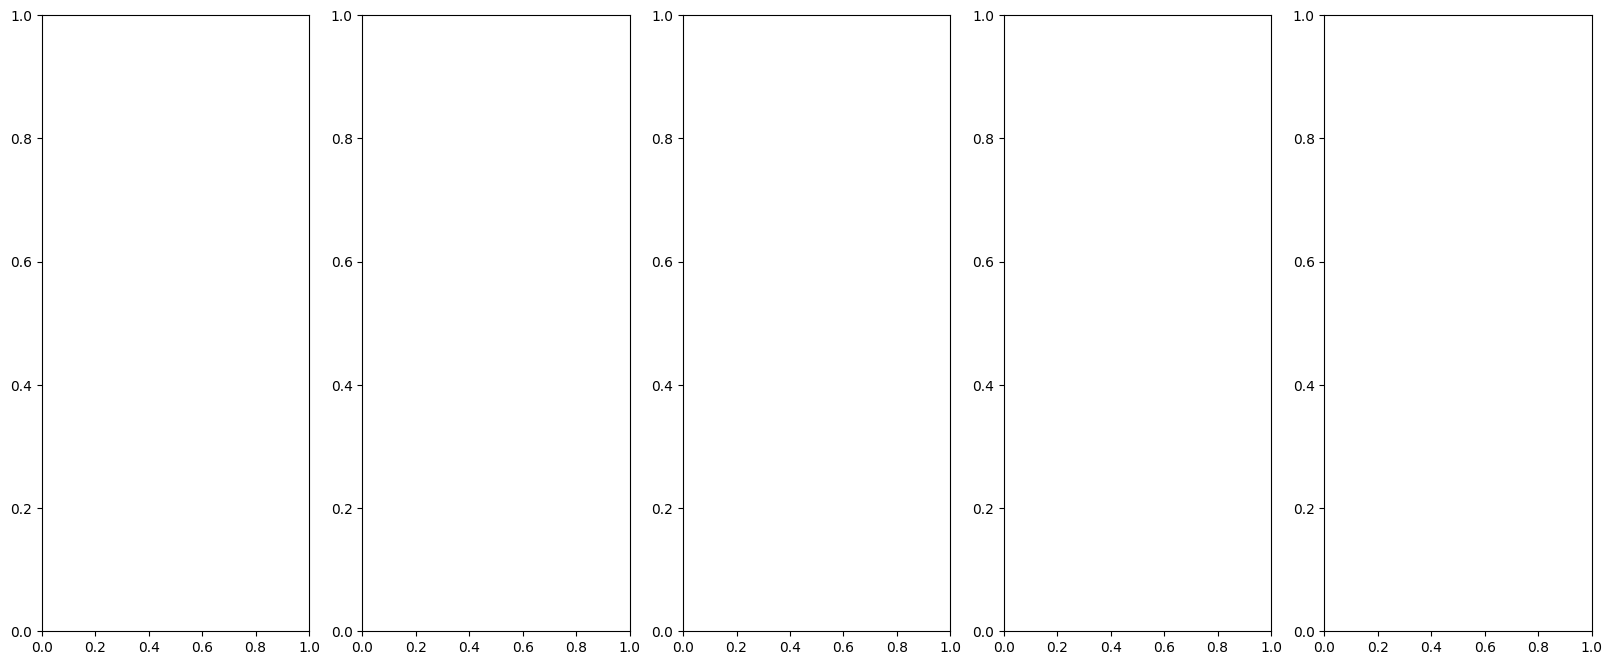

In [6]:
import cv2
import zarr
import numpy as np
import matplotlib.pyplot as plt

# draw dataset
dataset_path = "/home/lab/hanxiao/diffusion/data/rosbag/2024-8-19/zarr/2024-8-19.zarr"
dataset_path0 = "/home/lab/hanxiao/diffusion/data/pusht/pusht_cchi_v7_replay.zarr"
dataset_root = zarr.open(dataset_path, 'r')
dataset_root0 = zarr.open(dataset_path0, 'r')
print(dataset_root.tree(),dataset_root0.tree())
train_image_data = dataset_root['data']['img'][:]
train_image_data = np.moveaxis(train_image_data, -1, 1)
train_data = {
    'agent_pos': dataset_root['data']['state'][:,:2],
    'action': dataset_root['data']['action'][:]
}
episode_ends = dataset_root['meta']['episode_ends'][:]

# plot first 10 episodes and record the video
fig, axs = plt.subplots(1, 5, figsize=(20, 8))
for i in range(5):
    start_idx = 0
    if i > 0:
        start_idx = episode_ends[i-1]
    end_idx = episode_ends[i]
    episode_length = end_idx - start_idx
    ax = axs[i//5, i%5]
    ax.set_title(f"Episode {i}")
    ax.plot(train_data['agent_pos'][start_idx:end_idx,0],train_data['agent_pos'][start_idx:end_idx,1], label='Agent Position')
    ax.plot(train_data['action'][start_idx:end_idx,0],train_data['action'][start_idx:end_idx,1], label='Action')
    # 保证每张图之间的x轴刻度一致,y轴刻度一致,y轴一格为50。而且每个图的50长度是一样的
    ax.set_xticks(np.arange(0, 512, 50))
    ax.set_yticks(np.arange(0, 512, 50))
    # ax.set_aspect('equal')
    ax.legend()
    
    # Extract frames from train_image_data
    frames = train_image_data[start_idx:end_idx]
    frames = np.moveaxis(frames, 1, -1)
    frames = (frames).astype(np.uint8)
    # Write frames to a video file
    
    video_path = f"episode_{i}.avi"
    out = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'DIVX'), 10, (96, 96))
    for frame in frames:
        out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    out.release()
    
    

plt.tight_layout()
plt.show()
